In [1]:
from gurobipy import *
import pandas as pd

In [2]:
# Input
x_a = 0
y_a = 100
x_b = 100
y_b = 150
L = 25

I = range(1, 5)
I_2 = range(2, 5)

In [3]:
# Modeling
# add var
p3_1 = Model("problem1-1")    # build a new model

x = p3_1.addVars(I, lb = 0, vtype = GRB.CONTINUOUS, name = "x")
y = p3_1.addVars(I, lb = 0, vtype = GRB.CONTINUOUS, name = "y")

# setting the objective function 
p3_1.setObjective(
    (quicksum(y[i] for i in I))
    , GRB.MINIMIZE) 

# add constraints and name them
for i in I_2:
    p3_1.addConstr((x[i] - x[i - 1]) ** 2 + (y[i] - y[i-1]) ** 2 == L ** 2, name = f"length")
    
p3_1.addConstr((x[1] - x_a) ** 2 + (y[1] - y_a) ** 2 == L ** 2, name = f"length_1")

p3_1.addConstr((x_b - x[4]) ** 2 + (y_b - y[4]) ** 2 == L ** 2, name = f"length_5")
    
for i in I_2:
    p3_1.addConstr(x[i - 1] <= x[i], name = f"xorder")
    
p3_1.addConstr(x_a <= x[1], name = f"xorder_1")

p3_1.addConstr(x[4] <= x_b, name = f"xorder_5")

p3_1.params.NonConvex = 2
    
p3_1.optimize()


# Results
print("Results:\n")

# objective value
LR_ov = p3_1.objVal
print("objective value =", LR_ov)
print("")
    
# x, y
for i in I:
    print("dot", i, ":(", x[i].x, y[i].x, ")")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-25
Set parameter NonConvex to value 2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[rosetta2])
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads
Optimize a model with 5 rows, 8 columns and 8 nonzeros
Model fingerprint: 0xf4e4cb57
Model has 5 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e+00, 2e+00]
  QLMatrix range   [2e+02, 3e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
  QRHS range       [6e+02, 3e+04]
Presolve removed 2 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Presolve removed 2 rows and 0 columns
Presolve time: 0.00s
Presolved: 56 rows, 22 columns, 125 nonzeros
Presolved model has 14 bilinear constraint(s)
Variable types: 22 continuous, 0 integer (0 binary)

Root relaxation: objective 1.704295e+02, 10 iterations,

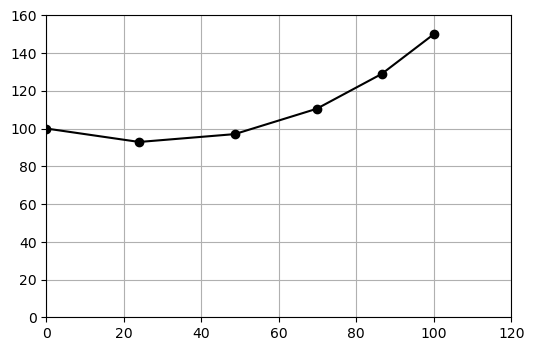

In [4]:
x_data = []
y_data = []
x_data.append(x_a)
y_data.append(y_a)
for i in I:
    x_data.append(x[i].x)
    y_data.append(y[i].x)
x_data.append(x_b)
y_data.append(y_b)

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100

plt.plot(x_data, y_data, 'k-o') # blue solid line with filled circle marker
plt.ylim(0, 160)
plt.xlim(0, 120)
plt.grid()
plt.savefig('fig1.png')
plt.show()